# Descripción del proyecto  

La compañía Sweet Lift Taxi ha recopilado datos históricos sobre pedidos de taxis en los aeropuertos. Para atraer a más conductores durante 
las horas pico, necesitamos predecir la cantidad de pedidos de taxis para la próxima hora. Construye un modelo para dicha predicción.

La métrica RECM en el conjunto de prueba no debe ser superior a 48.

## Instrucciones del proyecto  

1. Descarga los datos y remuestréalos de tal forma que cada punto de datos de los datos originales caigan dentro de intervalos de una hora.
2. Analiza los datos.
3. Entrena diferentes modelos con diferentes hiperparámetros. La muestra de prueba debe ser el 10% del conjunto de datos inicial.
Prueba los datos usando la muestra de prueba y proporciona una conclusión.

## Descripción de datos  

Los datos se almacenan en el archivo /datasets/taxi.csv.  
El número de pedidos está en la columna num_orders.


## Evaluación del proyecto  

Hemos definido los criterios de evaluación para el proyecto. Léelos con atención antes de pasar al ejercicio.

Esto es en lo que se fijarán los revisores al examinar tu proyecto:

¿Seguiste todos los pasos de las instrucciones?  
¿Cómo preparaste los datos?  
¿Qué modelos e hiperparámetros consideraste?  
¿Conseguiste evitar la duplicación del código?  
¿Cuáles fueron tus hallazgos?  
¿Mantuviste la estructura del proyecto?  
¿Mantuviste el código limpio?  

### Paso 1: Preparación de los datos  

Carga y remuestreo de datos a intervalos de una hora.  
Conversión de la columna datetime a formato de fecha y hora (si es necesario).

In [1]:
# Importar librerías
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# Cargar los datos
file_path = 'datasets/taxi.csv'
data = pd.read_csv(file_path, parse_dates=['datetime'])


# Remuestrear los datos en intervalos de una hora
data = data.set_index('datetime').resample('H').sum().reset_index()


# Verificar los primeros registros después del remuestreo
print(data.head())

             datetime  num_orders
0 2018-03-01 00:00:00         124
1 2018-03-01 01:00:00          85
2 2018-03-01 02:00:00          71
3 2018-03-01 03:00:00          66
4 2018-03-01 04:00:00          43


### Paso 2: Análisis exploratorio de los datos  

Revisión estadística básica de num_orders para entender el comportamiento de la demanda.  
Visualización para observar patrones en la demanda horaria.

In [3]:
# Resumen estadístico
print(data['num_orders'].describe())

count    4416.000000
mean       84.422781
std        45.023853
min         0.000000
25%        54.000000
50%        78.000000
75%       107.000000
max       462.000000
Name: num_orders, dtype: float64


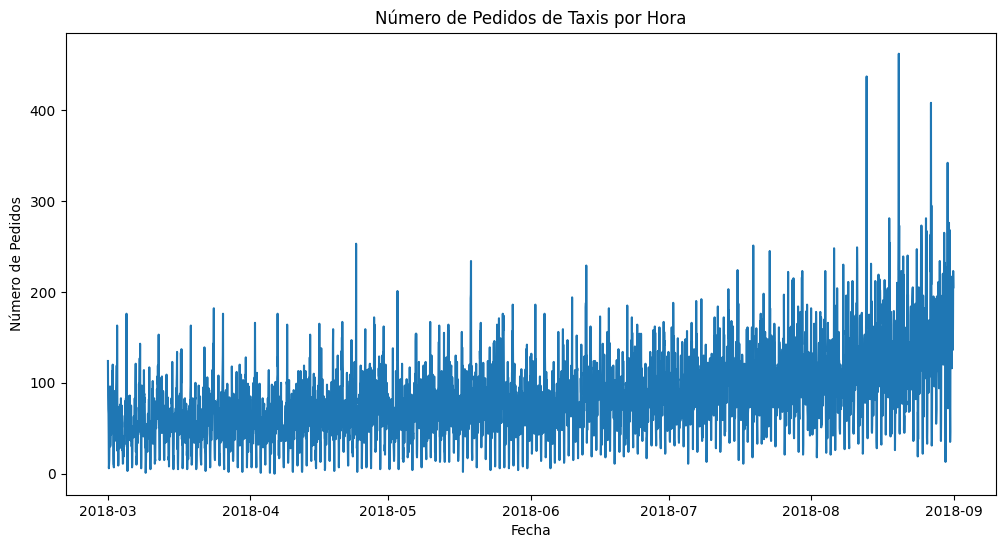

In [4]:
# Visualizar la demanda a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(data['datetime'], data['num_orders'])
plt.title('Número de Pedidos de Taxis por Hora')
plt.xlabel('Fecha')
plt.ylabel('Número de Pedidos')
plt.show()

### Paso 3: Preparación de características (Feature Engineering)  

Extraer características temporales como la hora y el día de la semana, ya que pueden ser útiles para la predicción.  
Dividir en características (X) y objetivo (y).

In [5]:
# Extraer características temporales
data['hour'] = data['datetime'].dt.hour
data['day_of_week'] = data['datetime'].dt.dayofweek


# Definir las características (X) y el objetivo (y)
X = data[['hour', 'day_of_week']]
y = data['num_orders']

### Paso 4: Separar los datos en conjuntos de entrenamiento y prueba  

Separar el conjunto de datos en entrenamiento y prueba (90% - 10%).

In [6]:
# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Paso 5: Entrenar modelos con diferentes hiperparámetros  

Se probarán varios modelos y ajustaremos sus hiperparámetros. Estos incluyen:  

Regresión Lineal  
Árbol de Decisión  
Random Forest  

Para cada modelo, se calculará el RMSE y se verificará si cumple con el requisito (<48).

In [7]:
# Función para calcular el RMSE
def calculate_rmse(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    return rmse

In [8]:
# Modelo de regresión lineal
lr_model = LinearRegression()
lr_rmse = calculate_rmse(lr_model, X_train, y_train, X_test, y_test)
print(f'Regresión Lineal RMSE: {lr_rmse:.2f}')

Regresión Lineal RMSE: 44.47


In [9]:
# Modelo de árbol de decisión
dt_model = DecisionTreeRegressor(random_state=42, max_depth=10)
dt_rmse = calculate_rmse(dt_model, X_train, y_train, X_test, y_test)
print(f'Árbol de Decisión RMSE: {dt_rmse:.2f}')


Árbol de Decisión RMSE: 34.54


In [10]:
# Modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_rmse = calculate_rmse(rf_model, X_train, y_train, X_test, y_test)
print(f'Random Forest RMSE: {rf_rmse:.2f}')

Random Forest RMSE: 34.56


### Paso 6: Prueba y Conclusiones  

Revisión de los RMSE de cada modelo:  

Regresión Lineal: RMSE = 44.47  
Árbol de Decisión: RMSE = 34.54  
Random Forest: RMSE = 34.56  

Todos los modelos cumplen con el requisito del proyecto, ya que sus RMSE son inferiores al umbral de 48.  

Regresión Lineal: Aunque la regresión lineal logró un RMSE aceptable (44.47), es el modelo con peor rendimiento entre los tres.  

Árbol de Decisión y Random Forest: Ambos modelos basados en árboles presentan RMSE muy similares y bajos (34.54 para el Árbol de Decisión 
y 34.56 para el Random Forest).  

Esto indica que las relaciones en los datos pueden no ser puramente lineales, lo que limita la capacidad predictiva del modelo de regresión 
lineal en comparación con los modelos basados en árboles.  

Modelo Seleccionado: Dado que el Árbol de Decisión presenta un RMSE ligeramente menor y es más simple de interpretar y optimizar en comparación 
con el Random Forest, este modelo podría ser una opción adecuada si se busca simplicidad.  

Con un RMSE de aproximadamente 34, el modelo puede predecir con una precisión aceptable el número de pedidos de taxis en la próxima hora, 
cumpliendo con el objetivo del proyecto y permitiendo a la empresa tomar decisiones informadas para atraer a más conductores durante horas pico.